# Project 2: Implementing a Simple Convolutional Neural Network (CNN)

## Introduction

In this project, you will design, implement, and evaluate a simple Convolutional Neural Network (CNN) from scratch. This will involve building the entire pipeline, from data preprocessing to model training and evaluation.

## Objectives

1. Set up TensorFlow or PyTorch environments. You are free to choose your preferred DL platform.
2. Use GPU for training.
3. Create a data loader and implement data preprocessing where needed.
4. Design a Convolutional Neural Network.
5. Train and evaluate your model. Make sure to clearly show loss and accuracy values. Include visualizations too.
6. Answer assessment questions.

## Dataset

You are free to choose any dataset for this project! Kaggle would be a good source to look for datasets. Below are some examples:
- CIFAR-10: A dataset of 60,000 32x32 color images in 10 classes with 6,000 images per class.
- MNIST: A dataset of 70,000 28x28 grayscale images of handwritten digits (0-9).
- Fashion-MNIST: A dataset of 70,000 28x28 grayscale images of 10 different clothing caregories.


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard

In [15]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to range [-1, 1]
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Define the classes
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [16]:
# Define the data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    zoom_range=0.2
)

# Fit the data generator to the training data (not required for MNIST, but keeping for consistency)
datagen.fit(train_images)

In [17]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),  # Fixed input shape
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (0-9)
])

# Compile the model
model.compile(optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if one-hot encoding
              metrics=['accuracy'])

In [19]:
# Convert labels to one-hot encoding (required for categorical_crossentropy)
train_labels_one_hot = to_categorical(train_labels, 10)
test_labels_one_hot = to_categorical(test_labels, 10)

# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="logs/mnist_experiment")

# Recompile the model with categorical_crossentropy
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss='categorical_crossentropy',  # Change from sparse_categorical_crossentropy
              metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(train_images, train_labels_one_hot, batch_size=32),
                    epochs=2,
                    validation_data=(test_images, test_labels_one_hot),
                    callbacks=[tensorboard_callback])

Epoch 1/2
   1/1875 [..............................] - ETA: 0s - loss: 54.3551 - accuracy: 0.0625WARNING:tensorflow:From S:\Anaconda\envs\ml_lab1\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 25s 13ms/step - loss: 2.3451 - accuracy: 0.1114 - val_loss: 2.2984 - val_accuracy: 0.1135
Epoch 2/2
1875/1875 [==============================] - 27s 14ms/step - loss: 2.2611 - accuracy: 0.1843 - val_loss: 2.1712 - val_accuracy: 0.1864


In [20]:
# Ensure test labels are one-hot encoded
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot, verbose=2)

print(f'Accuracy of the network on the 10,000 test images: {test_acc * 100:.2f}%')

313/313 - 1s - loss: 2.1712 - accuracy: 0.1864
Accuracy of the network on the 10,000 test images: 18.64%


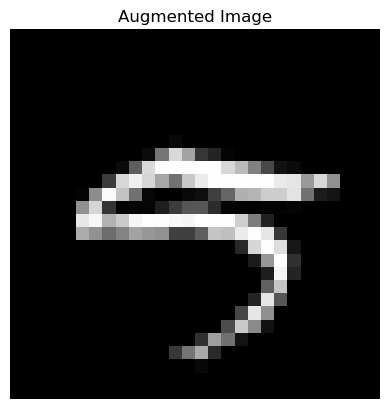

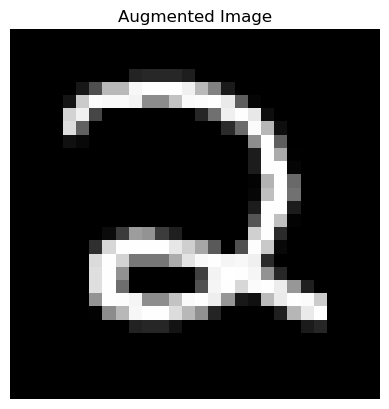

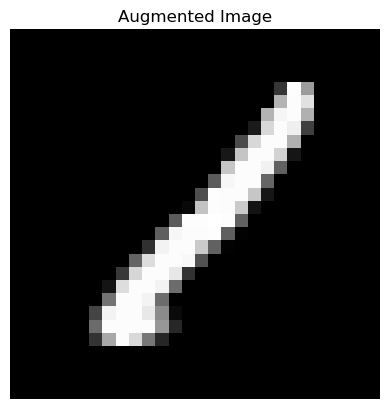

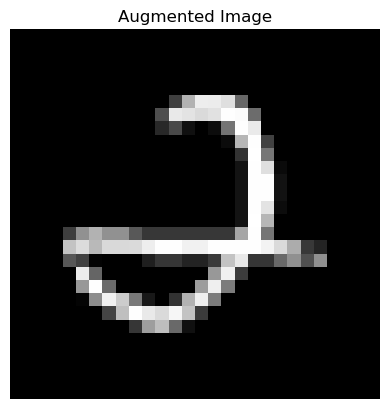

In [21]:
# Function to display an image
def imshow(img, title=None):
    img = np.squeeze(img)  # Remove extra channel dimension
    plt.imshow(img, cmap='gray')  # Use grayscale colormap
    if title is not None:
        plt.title(title)
    plt.axis("off")  # Remove axis for better visualization
    plt.show()

# Display 4 random training images
for _ in range(4):
    img = train_images[np.random.randint(len(train_images))]
    imshow(img, title="Augmented Image")

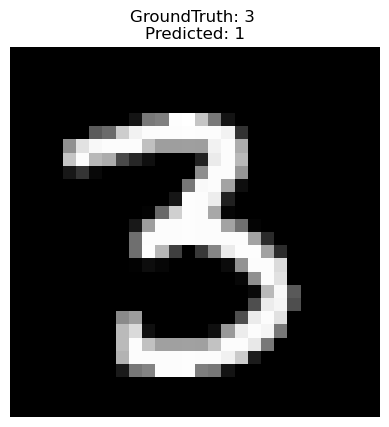

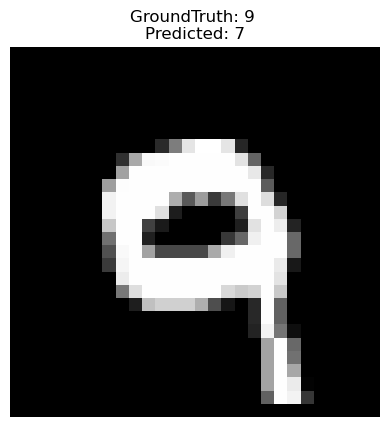

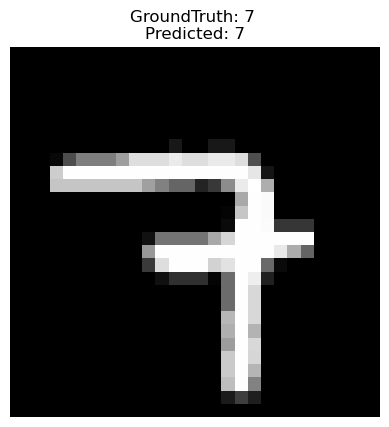

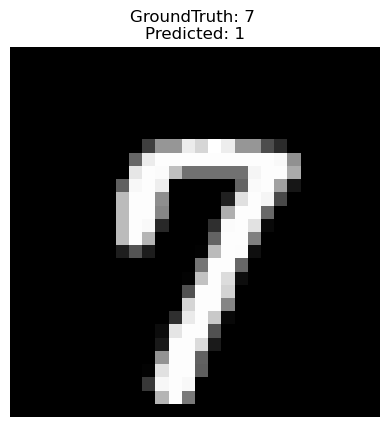

In [22]:
# Get some random test images
indices = np.random.choice(len(test_images), 4, replace=False)
images, labels = test_images[indices], test_labels[indices]

# Make predictions
predictions = model.predict(images)

# Plot images with predictions
for i in range(4):
    plt.figure()
    plt.imshow(images[i].squeeze(), cmap='gray')  # Fix grayscale rendering
    plt.title(f"GroundTruth: {class_names[labels[i]]} \nPredicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis("off")  # Remove axis for a cleaner look
    plt.show()

### Questions
### Answer the following questions in detail.

1. ### What is a Convolutional Neural Network (CNN)? Describe its key components and how they differ from those in a fully connected neural network.
Convolutional Neural Network (CNN)
A Convolutional Neural Network (CNN) is a specialized type of neural network designed for processing grid-like data, such as images. Unlike fully connected networks, CNNs use convolutional layers to detect spatial hierarchies in data, making them more efficient and effective for tasks like image classification, object detection, and segmentation.

Key Components of a CNN:
Convolutional Layers
Activation Function (ReLU)
Pooling Layers
Fully Connected (Dense) Layers
Dropout (Regularization Technique)
Softmax Layer (Output Layer for Classification Tasks)

Fully Connected Neural Network (FNN)
Uses only fully connected (dense) layers
Each neuron has separate weights
Learns global patterns (not ideal for images)
Large number of parameters, leading to overfitting
Structured data, tabular data


2. ### Explain the purpose of the convolution operation in a CNN. How does the use of different filter sizes affect the feature maps?
   The convolution operation in a Convolutional Neural Network (CNN) is the core mechanism used to extract meaningful patterns from input data, typically images. It replaces traditional fully connected layers with spatially-aware filters, enabling the network to detect features like edges, textures, and more complex structures.

   Filter Size	Effect:
1×1	Acts like a pixel-wise transformation (used in bottleneck layers for dimensionality reduction).
3×3 (most common)	Captures fine-grained local details, like edges and small patterns.
5×5	Captures slightly larger textures and patterns.
7×7 or larger	Detects broader patterns but increases computational cost.


4. ### What is the purpose of a pooling layer in a CNN, and how does it contribute to the network’s performance?
    A Pooling Layer in a Convolutional Neural Network (CNN) is used to reduce the spatial dimensions (height & width) of the feature maps while preserving important information. It helps the network become more computationally efficient and robust to variations in the input, such as small shifts or distortions.

How Pooling Improves CNN Performance
Reduces Computational Load – Fewer parameters and operations → Faster training & inference.
Controls Overfitting – By reducing spatial dimensions, it forces the network to focus on important patterns instead of memorizing exact positions.
Improves Translation Invariance – Small shifts in the image don’t affect the output significantly, making CNNs more robust.
Helps Deep Networks – Allows deeper architectures without excessive computation.

6. ### Why are activation functions important in CNNs? Compare the use of ReLU (Rectified Linear Unit) with other activation functions.
    Activation functions introduce non-linearity into a Convolutional Neural Network (CNN), allowing it to learn complex patterns beyond simple linear transformations. Without activation functions, a CNN would behave like a simple linear model, regardless of depth, limiting its ability to capture intricate features.

Comparison of Activation Functions in CNNs.
ReLU (Rectified Linear Unit)
How it works: If the input is positive, it stays the same. If it’s negative, it becomes zero.
Pros: It prevents the issue of vanishing gradients, is computationally efficient, and helps networks train faster.
Cons: Some neurons can "die" (always output zero), making them inactive.
Where it’s used: This is the most common activation function used in CNN hidden layers.

Leaky ReLU
How it works: Similar to ReLU, but instead of turning negative values into zero, it keeps them small (by multiplying them with a small constant).
Pros: Fixes the "dying ReLU" problem by allowing small negative values.
Cons: Slightly more complex than regular ReLU and requires tuning a small constant.
Where it’s used: Used when standard ReLU leads to inactive neurons.

Sigmoid
How it works: Converts any input into a value between 0 and 1.
Pros: Useful for problems where the output needs to be a probability (binary classification).
Cons: Causes vanishing gradients, making training slow and ineffective for deep networks.
Where it’s used: Mostly in the final output layer for binary classification tasks (e.g., yes/no predictions).

Tanh (Hyperbolic Tangent)
How it works: Similar to Sigmoid, but instead of outputting values between 0 and 1, it outputs values between -1 and 1.
Pros: Centered around zero, which helps in training compared to Sigmoid.
Cons: Still suffers from vanishing gradients, limiting its effectiveness in deep networks.
Where it’s used: Mostly in recurrent neural networks (RNNs), not common in CNNs.

Softmax
How it works: Converts a set of values into probabilities that sum up to 1, making it useful for multi-class classification.
Pros: Ensures that the network outputs meaningful probabilities across multiple classes.
Cons: Not suitable for hidden layers, only useful in the output layer.
Where it’s used: The final layer of CNNs when dealing with multi-class classification problems (e.g., classifying images into categories like "dog," "cat," "car").
   
8. ### Describe the process of training a CNN. What are some common challenges faced during training?
    Training a Convolutional Neural Network (CNN) involves several key steps, from preparing the data to optimizing the model’s parameters. Below is a step-by-step breakdown:
Data Preprocessing
Forward Propagation
Compute Loss
Backpropagation and Optimization
Iterative Training Over Multiple Epochs
Evaluate the Model

Common Challenges in Training a CNN
Overfitting
The model memorizes training data but fails on new data.

Vanishing Gradients
Early layers stop learning because gradients shrink during backpropagation.

Exploding Gradients
Large weight updates make training unstable.

High Computational Cost
CNNs require powerful GPUs to process large datasets.

Class Imbalance
Some classes appear more than others, leading to biased predictions.

 
10. ### What are some common evaluation metrics used to assess the performance of a CNN on a classification task?
    Once a Convolutional Neural Network (CNN) is trained, it needs to be evaluated using various performance metrics to determine how well it classifies images. The choice of metrics depends on whether the classification problem is binary (two classes) or multi-class (multiple categories):
Accuracy
Precision, Recall, and F1-Score
Confusion Matrix
ROC Curve and AUC (Area Under Curve)
Top-K Accuracy (For Multi-Class Classification)
Mean Average Precision (mAP)

12. ### How does data augmentation help improve the performance of a CNN? Provide examples of common data augmentation techniques.
Data augmentation is a technique used to artificially expand a training dataset by applying transformations to the original images. This helps improve the performance of a Convolutional Neural Network (CNN) by making the model more robust and generalizable to unseen data.

Common Data Augmentation Techniques
Rotation
This involves rotating an image by a certain degree, such as turning it slightly to the left or right.
This helps the CNN recognize objects even if they appear at different angles, making it more robust to real-world variations.

Flipping (Horizontal or Vertical)
This mirrors the image either horizontally (left-right) or vertically (top-bottom).
It is useful when the orientation of the object does not matter, such as in face recognition or animal classification.

Translation (Shifting)
This moves the image left, right, up, or down by a small amount.
This ensures that the CNN can detect objects even if they are not perfectly centered in the image.

Zooming
This enlarges or shrinks a part of the image, focusing on a smaller or larger portion of the object.
This allows the CNN to recognize objects at different scales, improving its ability to detect both close-up and distant objects.

Brightness Adjustment
This increases or decreases the brightness of an image, simulating different lighting conditions.
This helps the CNN handle variations in lighting, such as shadows or bright sunlight.

Contrast Variation
This makes some parts of the image darker or lighter to change the contrast between objects and their background.
It helps the CNN recognize objects even in low-light or high-exposure conditions.

Shearing
This tilts or skews the image in one direction, making objects appear slanted.
This helps the CNN recognize objects that may be distorted due to perspective changes.

dding Noise
This introduces small random pixel variations, similar to camera noise or imperfections in real-world images.
It makes the CNN more robust to blurry, low-quality, or distorted images.

Real-World Applications of Data Augmentation
Self-Driving Cars: Simulating different weather conditions (rain, fog) using brightness/contrast changes.
Medical Imaging: Flipping and rotating X-rays to improve disease detection accuracy.
Facial Recognition: Adding noise and blurring to make the model robust to real-world variations.